In [43]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [9]:
# Dosyayı oku
data = pd.read_excel(r"C:\Users\ilayd\OneDrive\Masaüstü\HousingData.xlsx")

In [11]:
# Veri seti hakkında genel bilgi
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
None


In [ ]:
##CRIM - Kişi başına düşen kasaba suç oranı
##ZN - 25.000 m²'den büyük arsalara sahip konut arazilerinin oranı
##INDUS - Kasabadaki perakende dışı ticari alanların oranı
##CHAS - Charles Nehri sahte değişkeni (Eğer bölge nehirle sınırlıysa 1, aksi takdirde 0)
##NOX - Azot oksit konsantrasyonu (10 milyon parça başına)
##RM - Bir konut başına düşen ortalama oda sayısı
##AGE - 1940'tan önce inşa edilmiş, ev sahiplerinin oturduğu birimlerin oranı
##DIS - Boston'daki beş istihdam merkezine olan ağırlıklı mesafeler
##RAD - Ana yollara erişim indeksi
##TAX - 10.000 dolarlık tam değerli emlak vergisi oranı
##PTRATIO - Kasaba başına düşen öğrenci-öğretmen oranı
##B - 1000(Bk - 0.63)^2, burada Bk kasaba başına düşen siyah nüfus oranıdır
##LSTAT - Nüfusun düşük sosyo-ekonomik statüye sahip yüzdesi
##MEDV - Ev sahibi olunan konutların medyan değeri (bin dolar cinsinden)

In [14]:
# İlk 5 satırı yazdır
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [15]:
# Son 5 satırı yazdır
data.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,NaN,2.5050,1,273,21.0,396.90,7.88,11.9


C:\Users\ilayd\AppData\Local\Temp\ipykernel_4568\1306573460.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['MEDV'], color='g',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)


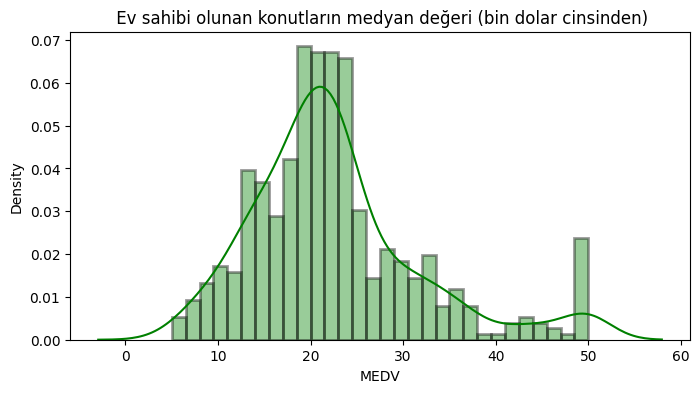

In [82]:
#MEDV değişkeninin dağılımını görselleştirme
plt.figure(figsize=[8,4])
sns.distplot(data['MEDV'], color='g',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)
plt.title(' Ev sahibi olunan konutların medyan değeri (bin dolar cinsinden)')
plt.show()

In [20]:
# Özet istatistiklerini yazdır(Daha okunabilir olması için transpoze edilmiş şekilde yazdır(T))
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,486.0,3.611874,8.720192,0.00632,0.081900,0.253715,3.560263,88.9762
ZN,486.0,11.211934,23.388876,0.00000,0.000000,0.000000,12.500000,100.0000
INDUS,486.0,11.083992,6.835896,0.46000,5.190000,9.690000,18.100000,27.7400
CHAS,486.0,0.069959,0.255340,0.00000,0.000000,0.000000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.538000,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.208500,6.623500,8.7800
AGE,486.0,68.518519,27.999513,2.90000,45.175000,76.800000,93.975000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.207450,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.000000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.000000,666.000000,711.0000


In [21]:
# Eksik değerlerin kontrol edilmesi(isna yerine isnull da kullanılabilir)
data.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [24]:
# Eksik verilerin veri setinden çıkartılması
data = data.dropna()

In [26]:
# Veri setinin yeni haliyle ilgili genel bilgi
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 394 entries, 0 to 504
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     394 non-null    float64
 1   ZN       394 non-null    float64
 2   INDUS    394 non-null    float64
 3   CHAS     394 non-null    float64
 4   NOX      394 non-null    float64
 5   RM       394 non-null    float64
 6   AGE      394 non-null    float64
 7   DIS      394 non-null    float64
 8   RAD      394 non-null    int64  
 9   TAX      394 non-null    int64  
 10  PTRATIO  394 non-null    float64
 11  B        394 non-null    float64
 12  LSTAT    394 non-null    float64
 13  MEDV     394 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 46.2 KB
None


MEDV       1.000000
RM         0.723951
ZN         0.406822
B          0.347256
DIS        0.279547
CHAS       0.173701
CRIM      -0.397230
AGE       -0.407470
RAD       -0.416638
NOX       -0.459054
TAX       -0.508864
INDUS     -0.510829
PTRATIO   -0.543809
LSTAT     -0.743450
Name: MEDV, dtype: float64


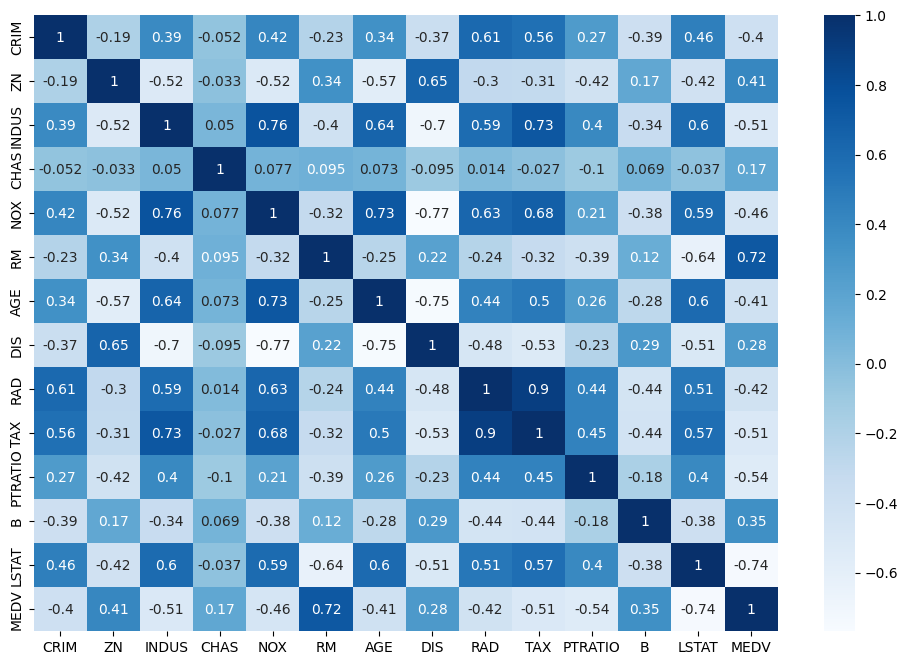

In [34]:
# Korelasyon matrisi
corr_matrix = data.corr()
print(corr_matrix['MEDV'].sort_values(ascending=False))   #(MEDV ile diğer sütunlar arasındaki korelasyon katsayılarını yazdırma)

# Korelasyon ısı haritası
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.show()

In [39]:
# X ve Y değişkenlerini belirleme
X = data.drop(['MEDV'], axis=1)
Y = data['MEDV']

In [40]:
# Bağımsız değişkenler
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6,391,19.2,396.90,14.33
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64


In [41]:
#Bağımlı değişken
Y

0      24.0
1      21.6
2      34.7
3      33.4
5      28.7
       ... 
499    17.5
500    16.8
502    20.6
503    23.9
504    22.0
Name: MEDV, Length: 394, dtype: float64

In [42]:
# Veri setini eğitim ve test setlerine ayırın
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [44]:
# Veri ölçekleme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [45]:
# Modeli oluşturun
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [46]:
# Tahminler yapın
y_pred = model.predict(X_test_scaled)

In [47]:
# Performans metriklerini hesaplayın
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 31.454047664950856
R^2 Score: 0.6270849941673193


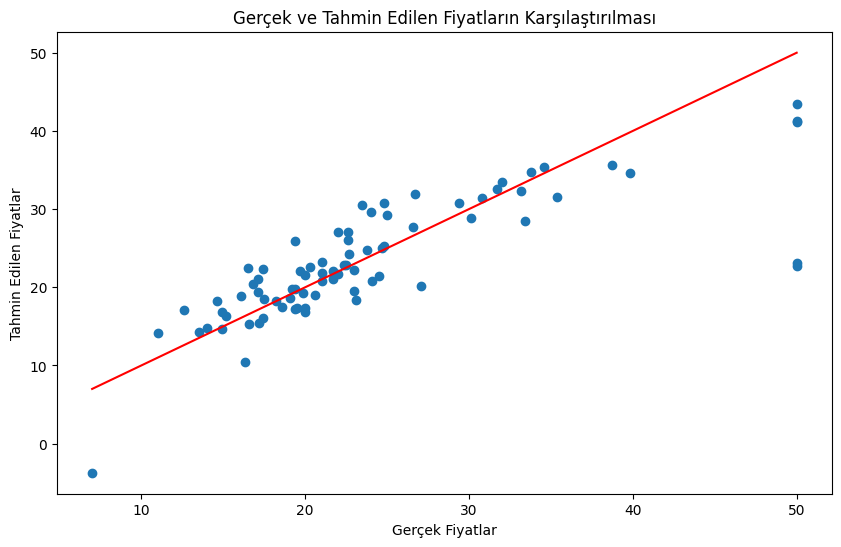

In [61]:
# Regresyon grafiğini oluşturma
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, label='Lineer Regresyon')
plt.xlabel('Gerçek Fiyatlar')
plt.ylabel('Tahmin Edilen Fiyatlar')
plt.title('Gerçek ve Tahmin Edilen Fiyatların Karşılaştırılması')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  
plt.show()


In [62]:
# 2.aşama Dosyayı oku
data = pd.read_excel(r"C:\Users\ilayd\OneDrive\Masaüstü\HousingData.xlsx")

In [64]:
# Eksik değerlerin kontrol edilmesi
data.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [66]:
# Veri setindeki eksik değerlerin ortalamayla doldurulması
data['CRIM'].fillna(data['CRIM'].mean(), inplace=True)
data['ZN'].fillna(data['ZN'].mean(), inplace=True)
data['INDUS'].fillna(data['INDUS'].mean(), inplace=True)
data['CHAS'].fillna(data['CHAS'].mode()[0], inplace=True)  
data['AGE'].fillna(data['AGE'].mean(), inplace=True)
data['LSTAT'].fillna(data['LSTAT'].mean(), inplace=True)
data.head()

C:\Users\ilayd\AppData\Local\Temp\ipykernel_4568\808409961.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['CRIM'].fillna(data['CRIM'].mean(), inplace=True)
C:\Users\ilayd\AppData\Local\Temp\ipykernel_4568\808409961.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.980000,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.140000,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.030000,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.940000,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,12.715432,36.2


In [69]:
# Gözlemleri kontrol etme
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

MEDV       1.000000
RM         0.695360
ZN         0.365943
B          0.333461
DIS        0.249929
CHAS       0.183844
CRIM      -0.379695
AGE       -0.380223
RAD       -0.381626
NOX       -0.427321
TAX       -0.468536
INDUS     -0.478657
PTRATIO   -0.507787
LSTAT     -0.721975
Name: MEDV, dtype: float64


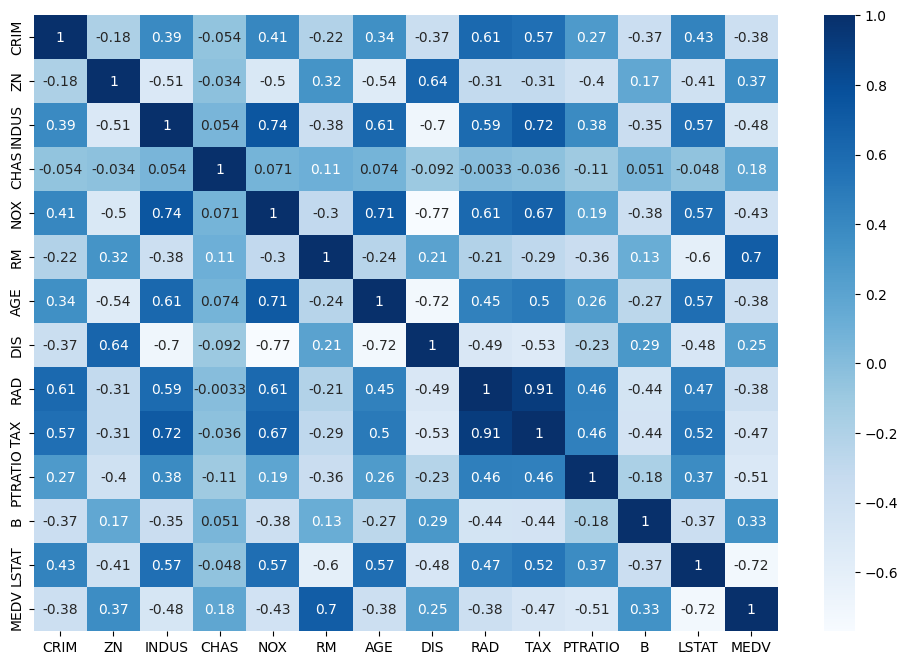

In [84]:
# Korelasyon matrisi
corr_matrix = data.corr()
print(corr_matrix['MEDV'].sort_values(ascending=False))   #(MEDV ile diğer sütunlar arasındaki korelasyon katsayılarını yazdırma)

# Korelasyon ısı haritası
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.show()

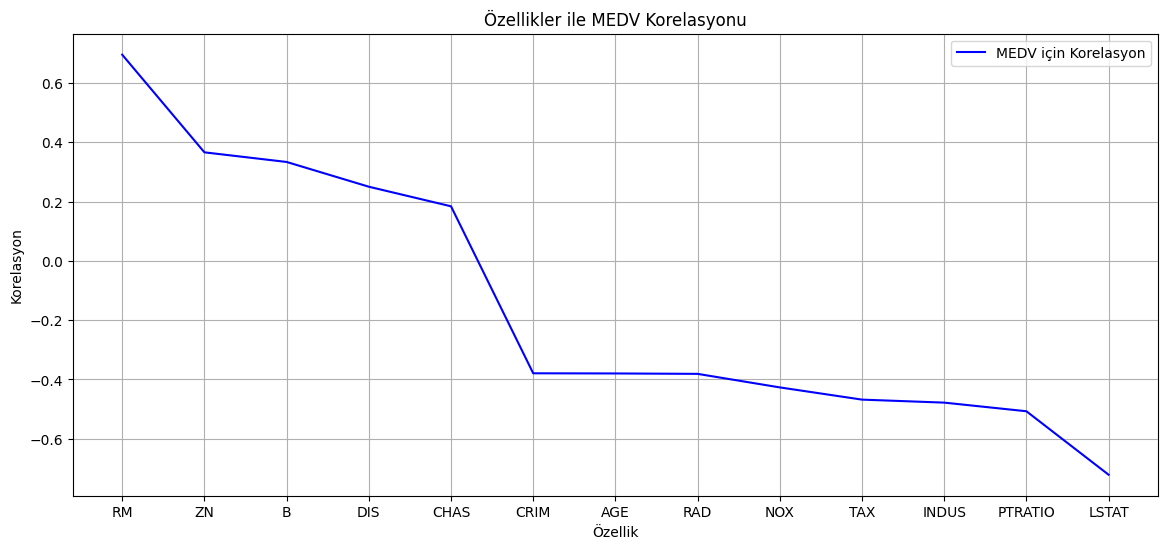

In [87]:
import matplotlib.pyplot as plt

# MEDV ile diğer özelliklerin korelasyonlarını kontrol etmek için plot
plt.figure(figsize=(14,6))
plt.plot(corr_matrix["MEDV"].sort_values(ascending=False)[1:], label="MEDV için Korelasyon", color="blue")
plt.ylabel("Korelasyon")
plt.xlabel("Özellik")
plt.grid(True)
plt.legend()
plt.title("Özellikler ile MEDV Korelasyonu")
plt.show()

In [70]:
# X ve Y değişkenlerini belirleme
X = data.drop(['MEDV'], axis=1)
Y = data['MEDV']

In [73]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.200000,4.0900,1,296,15.3,396.90,4.980000
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.900000,4.9671,2,242,17.8,396.90,9.140000
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.100000,4.9671,2,242,17.8,392.83,4.030000
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.800000,6.0622,3,222,18.7,394.63,2.940000
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.200000,6.0622,3,222,18.7,396.90,12.715432
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.100000,2.4786,1,273,21.0,391.99,12.715432
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.700000,2.2875,1,273,21.0,396.90,9.080000
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.000000,2.1675,1,273,21.0,396.90,5.640000
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.300000,2.3889,1,273,21.0,393.45,6.480000


In [74]:
Y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [75]:
# Veri setini eğitim ve test setlerine ayırın
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Veri ölçekleme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modeli oluşturun
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Tahminler yapın
y_pred = model.predict(X_test_scaled)

# Performans metriklerini hesaplayın
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 25.044653291454416
R^2 Score: 0.6584840954311388


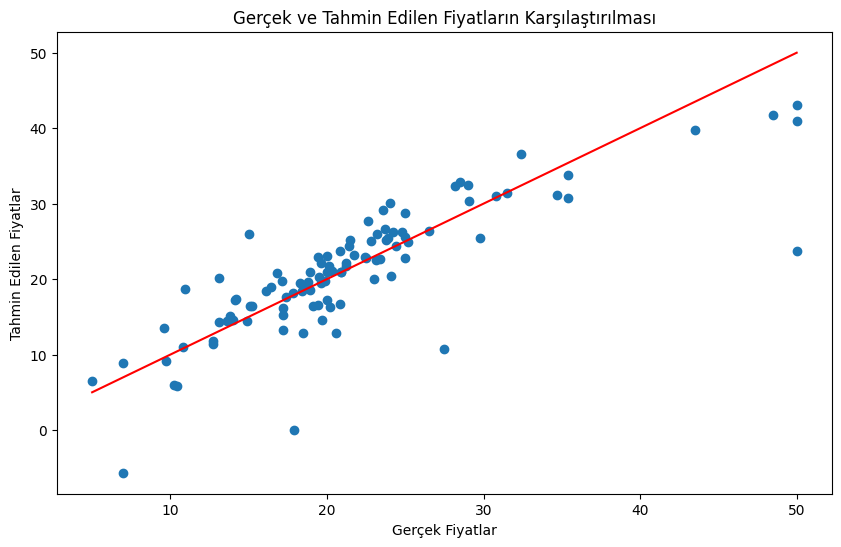

In [78]:
# Regresyon grafiğini oluşturma
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, label='Lineer Regresyon')
plt.xlabel('Gerçek Fiyatlar')
plt.ylabel('Tahmin Edilen Fiyatlar')
plt.title('Gerçek ve Tahmin Edilen Fiyatların Karşılaştırılması')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  
plt.show()